In [2]:
from bandexcitation.File.DataWriter import DataConverter
from bandexcitation.Measurement.BEMeasurement import BEMeasurement
from bandexcitation.File.DataWriter import DataConverter

import matplotlib.pyplot as plt

import numpy as np

In [4]:
beparms = BEMeasurement(spectroscopic_min_voltage=-4, 
                   spectroscopic_max_voltage=4, 
                   BE_rep=4, 
                   BE_time = 1e-3,
                   BE_ampl = 1,
                   AI_sample_rate=1e6, 
                   BE_ppw = 2**13,
                   BE_center_freq = 340e3, 
                   BE_bandwidth = 60e3, 
                   BE_num_bins = 156,
                   AI_photodiode_vertical_range=1,
                   AI_AWG_channel_num=1,
                   BE_smoothing = 125
                  )

Initializing BEparams
0


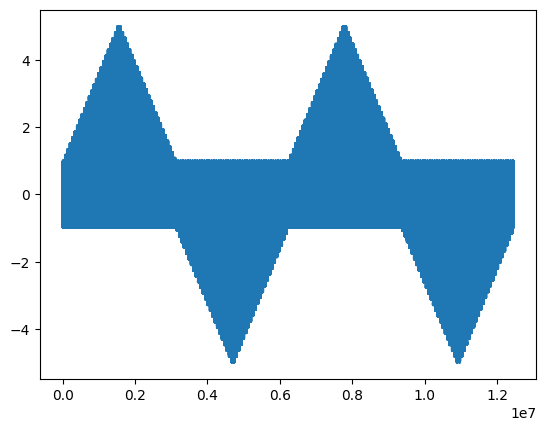

In [5]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform)

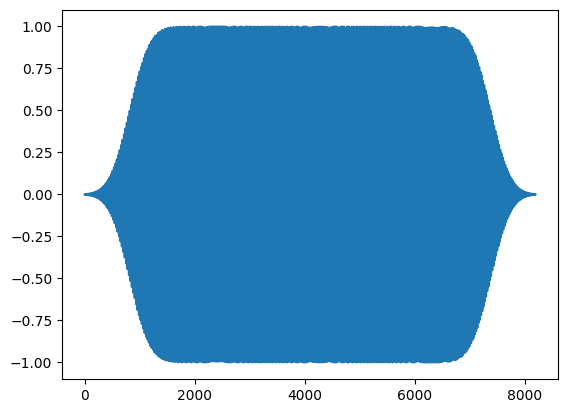

In [10]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform[0:beparms.BE_ppw])

In [14]:
wave = beparms.get_simulated_BE_measurement()[0:int(beparms.AI_sample_rate*beparms.BE_time)]

dc = DataConverter(wave)

BE_FFT = DataConverter.BE_FFT(wave)
freqs = DataConverter.BE_frequencies(len(wave), beparms.AI_sample_rate)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-beparms.BE_bandwidth/2, beparms.BE_center_freq+beparms.BE_bandwidth/2), beparms.BE_num_bins)



(310000.0, 370000.0)


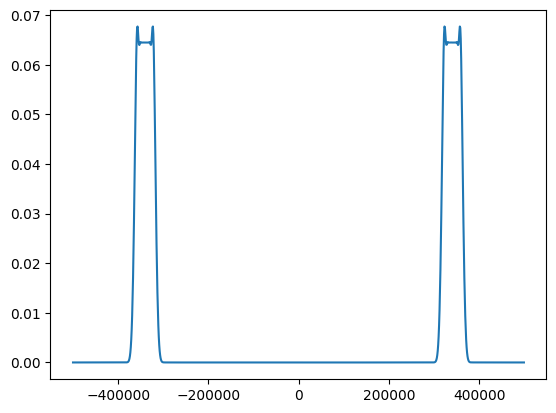

In [15]:
plt.plot(freqs, np.abs(BE_FFT))
# plt.xlim(310000,370000)

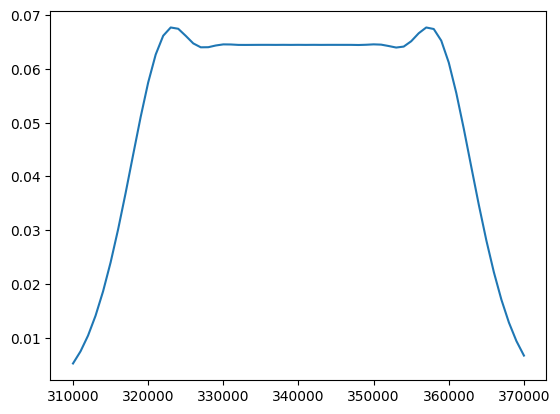

In [16]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))

In [17]:
measurement = beparms.PXI.run()

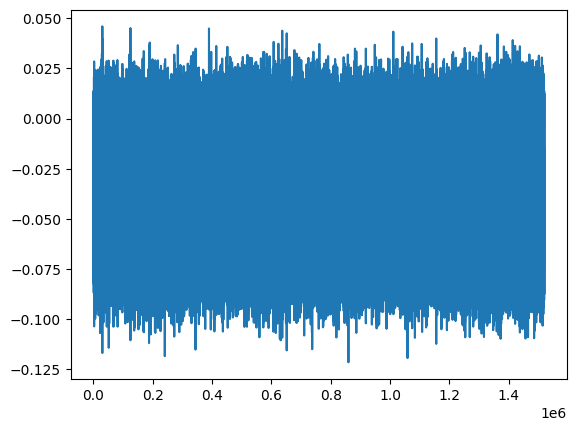

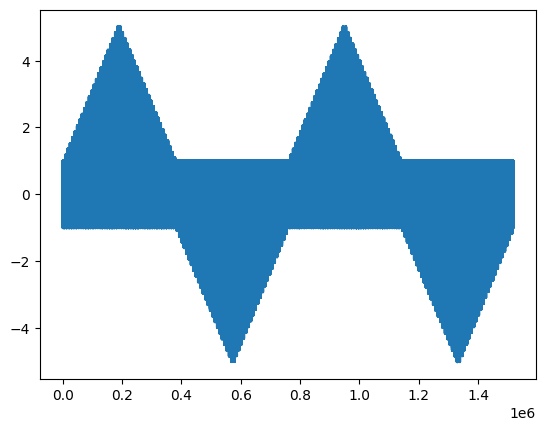

In [18]:

plt.plot(np.array(measurement[0].samples))
plt.figure()
plt.plot(np.array(measurement[1].samples))


In [40]:
beparms.AI_sample_rate*beparms.BE_time

1000.0

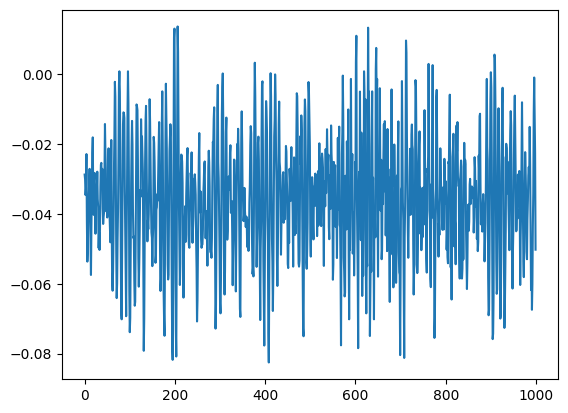

In [47]:
wave = np.array(measurement[0].samples)

plt.plot(wave[0:int(beparms.AI_sample_rate*beparms.BE_time)])

In [41]:
n=np.random.randint(0,100)

measured_wave = wave[int(beparms.AI_sample_rate*beparms.BE_time*n):int(beparms.AI_sample_rate*beparms.BE_time*(n+1))]
dc = DataConverter(measured_wave)

BE_FFT = DataConverter.BE_FFT(measured_wave)
freqs = DataConverter.BE_frequencies(len(measured_wave), beparms.AI_sample_rate)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-beparms.BE_bandwidth/2, beparms.BE_center_freq+beparms.BE_bandwidth/2), beparms.BE_num_bins)

(310000.0, 370000.0)


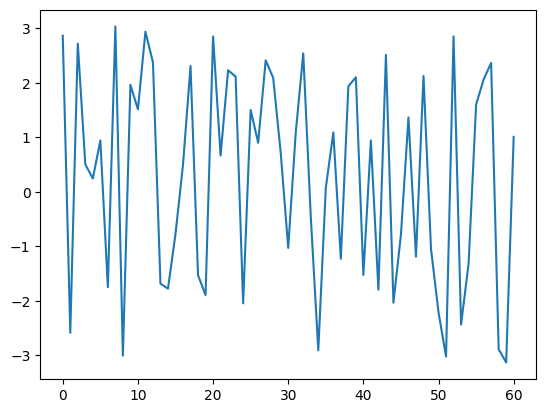

In [42]:
plt.plot(np.angle(np.fft.fft(measured_wave)[inds]))

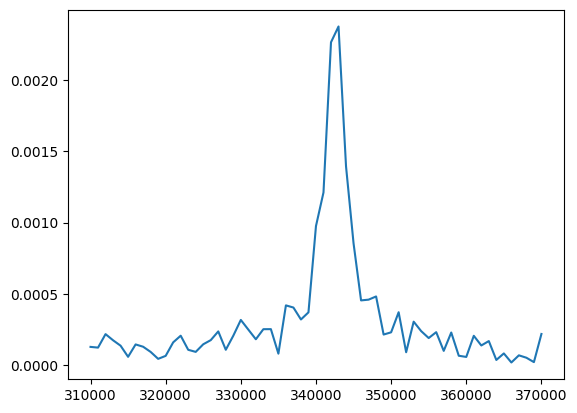

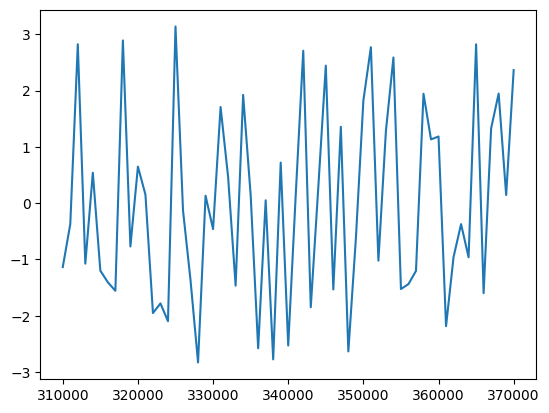

In [43]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))
plt.figure()
plt.plot(freqs[inds], np.angle(BE_FFT[inds]))

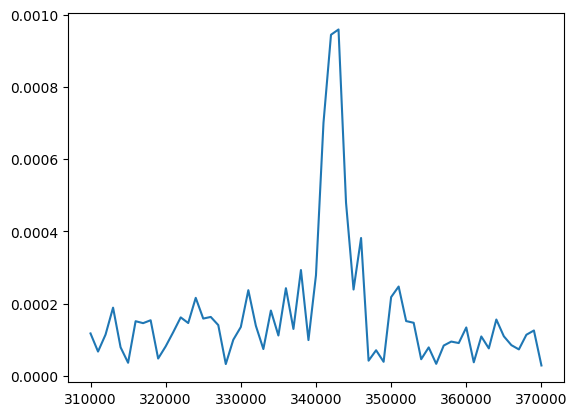

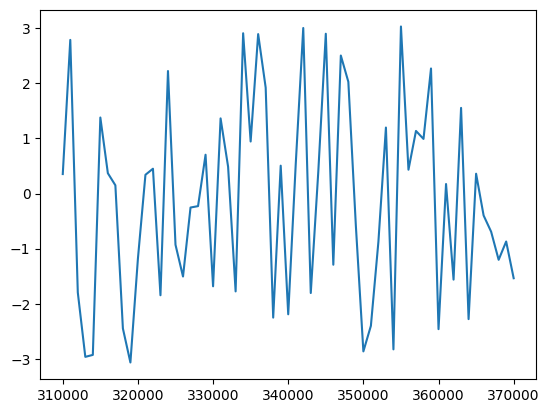

In [40]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))
plt.figure()
plt.plot(freqs[inds], np.angle(BE_FFT[inds]))